# Predictions Chart

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import new_wrangle as w

### Build train predictions df

In [52]:
# read in train predictions .csv
train_pred = pd.read_csv('train_pred.csv')
train_pred.head()

<IPython.core.display.Javascript object>

,id,pol3_RFE
0,2011-09-16_store_12_2011-09-23,8.639851e+05
1,2012-08-10_store_4_2012-08-17,2.335937e+06
2,2011-12-09_store_27_2011-12-16,2.250538e+06
3,2011-12-30_store_1_2012-01-06,1.475400e+06
4,2012-08-31_store_43_2012-09-07,6.268589e+05


In [53]:
train_pred['next_week_date'] = train_pred.id.str[-10:]

In [54]:
# strip this_week_date and store from train predictions and put into column
train_pred['this_week_date'] = train_pred.id.str[0:10]
train_pred['store'] = train_pred.id.str[17:19]

In [55]:
train_pred.head()

,id,pol3_RFE,next_week_date,this_week_date,store
0,2011-09-16_store_12_2011-09-23,8.639851e+05,2011-09-23,2011-09-16,12
1,2012-08-10_store_4_2012-08-17,2.335937e+06,2012-08-17,2012-08-10,4_
2,2011-12-09_store_27_2011-12-16,2.250538e+06,2011-12-16,2011-12-09,27
3,2011-12-30_store_1_2012-01-06,1.475400e+06,2012-01-06,2011-12-30,1_
4,2012-08-31_store_43_2012-09-07,6.268589e+05,2012-09-07,2012-08-31,43


In [63]:
train_pred = train_pred.rename(columns={'pol3_RFE':'predictions'})
train_pred.head()

,id,predictions,next_week_date,this_week_date,store
0,2011-09-16_store_12_2011-09-23,8.639851e+05,2011-09-23,2011-09-16,12
1,2012-08-10_store_4_2012-08-17,2.335937e+06,2012-08-17,2012-08-10,4_
2,2011-12-09_store_27_2011-12-16,2.250538e+06,2011-12-16,2011-12-09,27
3,2011-12-30_store_1_2012-01-06,1.475400e+06,2012-01-06,2011-12-30,1_
4,2012-08-31_store_43_2012-09-07,6.268589e+05,2012-09-07,2012-08-31,43


### Build test predictions df

In [56]:
# Read in test predictions .csv
pred = pd.read_csv('pred_df.csv')

<IPython.core.display.Javascript object>

In [57]:
# strip store from test predictions and put into column
pred['store'] = pred.id.str[17:19]

In [58]:
pred.head()

,id,actual,test_polreg,this_week_date,next_week_date,store
0,2011-03-18_store_7_2011-03-25,559061.58,5.527137e+05,2011-03-18,2011-03-25,7_
1,2012-10-19_store_41_2012-10-26,1316542.59,1.335390e+06,2012-10-19,2012-10-26,41
2,2012-02-17_store_36_2012-02-24,313270.45,3.505920e+05,2012-02-17,2012-02-24,36
3,2012-03-16_store_26_2012-03-23,874790.68,8.858348e+05,2012-03-16,2012-03-23,26
4,2012-03-02_store_43_2012-03-09,636677.67,6.678347e+05,2012-03-02,2012-03-09,43


In [65]:
pred = pred.rename(columns={'test_polreg':'predictions'})
pred.head()

,id,actual,predictions,this_week_date,next_week_date,store
0,2011-03-18_store_7_2011-03-25,559061.58,5.527137e+05,2011-03-18,2011-03-25,7_
1,2012-10-19_store_41_2012-10-26,1316542.59,1.335390e+06,2012-10-19,2012-10-26,41
2,2012-02-17_store_36_2012-02-24,313270.45,3.505920e+05,2012-02-17,2012-02-24,36
3,2012-03-16_store_26_2012-03-23,874790.68,8.858348e+05,2012-03-16,2012-03-23,26
4,2012-03-02_store_43_2012-03-09,636677.67,6.678347e+05,2012-03-02,2012-03-09,43


In [69]:
test_chart = pred[['id', 'predictions','next_week_date', 'this_week_date', 'store']]

In [70]:
test_chart.head()

,id,predictions,next_week_date,this_week_date,store
0,2011-03-18_store_7_2011-03-25,5.527137e+05,2011-03-25,2011-03-18,7_
1,2012-10-19_store_41_2012-10-26,1.335390e+06,2012-10-26,2012-10-19,41
2,2012-02-17_store_36_2012-02-24,3.505920e+05,2012-02-24,2012-02-17,36
3,2012-03-16_store_26_2012-03-23,8.858348e+05,2012-03-23,2012-03-16,26
4,2012-03-02_store_43_2012-03-09,6.678347e+05,2012-03-09,2012-03-02,43


### Separate out store 7 

In [93]:
pred7 = pred[pred.store=='7_']
pred7.head()

,id,actual,predictions,this_week_date,next_week_date,store
0,2011-03-18_store_7_2011-03-25,559061.58,552713.661347,2011-03-18,2011-03-25,7_
72,2012-02-17_store_7_2012-02-24,603041.14,580553.361942,2012-02-17,2012-02-24,7_
86,2011-07-08_store_7_2011-07-15,642748.21,666256.669885,2011-07-08,2011-07-15,7_
124,2011-12-30_store_7_2012-01-06,713117.66,707382.042026,2011-12-30,2012-01-06,7_
129,2011-02-04_store_7_2011-02-11,559903.13,546743.444445,2011-02-04,2011-02-11,7_


In [94]:
train_pred7 = train_pred[train_pred.store=='7_'].sort_values(by='next_week_date') 
train_pred7.head()

,id,predictions,next_week_date,this_week_date,store
1120,2011-02-11_store_7_2011-02-18,532297.451606,2011-02-18,2011-02-11,7_
2423,2011-02-18_store_7_2011-02-25,529855.803583,2011-02-25,2011-02-18,7_
1832,2011-03-04_store_7_2011-03-11,513422.821238,2011-03-11,2011-03-04,7_
2665,2011-03-11_store_7_2011-03-18,574263.894968,2011-03-18,2011-03-11,7_
2775,2011-04-01_store_7_2011-04-08,497572.231465,2011-04-08,2011-04-01,7_


### Append both df's into 1

In [118]:
pred = pred7.append(train_pred7)

In [119]:
pred.sort_values(by='next_week_date') 

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [137]:
predc = pred.sort_values(by='next_week_date')

In [141]:
predc['next_week_date'] = pd.to_datetime(predc.next_week_date)

In [153]:
pred_2012 = predc[predc.next_week_date.dt.year == 2012]

### Acquire actual sales df

In [106]:
df = w.acquire_data()

In [107]:
df['Date'] = pd.to_datetime(df.Date)

In [108]:
df = df.set_index('Date').sort_index()

In [159]:
df[df.Store==7]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Recommended Action')

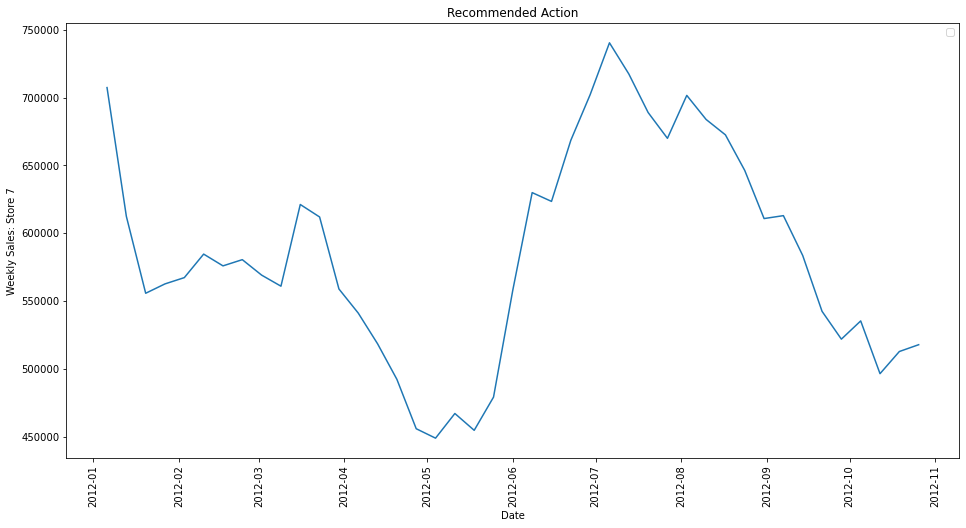

In [156]:
plt.figure(figsize=(16,8))
sns.lineplot(data=pred_2012, x="next_week_date", y="predictions")
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Weekly Sales: Store 7")
plt.title("Recommended Action")